In [201]:
import numpy as np
from random import *
import random
import math
import matplotlib.pyplot as plt
import networkx as nx 
from time import time

# Generate adjacency matrix

In [202]:
size = 100
ed = 500
array = np.zeros((size,size), dtype=int)

edges = 0

while edges<ed:
    edges+=1
    a = 1
    b = 1
    while a==b or array[a-1][b-1]==1:
        a = randint(1,size)
        b = randint(1,size)
    array[a-1][b-1] = randint(1,20)
    array[b-1][a-1] = array[a-1][b-1]

In [203]:
import pandas as pd
table = pd.DataFrame(data=array,columns=np.arange(1,array.shape[0]+1),index=np.arange(1,array.shape[1]+1))
# print(table.head())
table

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
1,0,0,0,0,0,0,3,0,5,0,...,0,0,0,0,3,0,3,0,7,16
2,0,0,0,0,0,0,0,16,0,0,...,0,2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,12,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,0,0,0,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,0
97,3,0,1,0,0,0,18,0,0,0,...,0,0,10,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,7,0,0,0,0,0,0,0,0,0,...,0,0,0,14,7,0,0,0,0,0


In [204]:
! pip install decorator==5.1.0

# Visualizing graph 

<ipython-input-205-997995837d9a>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "D:/Магистр/Algorithms/graph_6.1.png", dpi=300, facecolor='w', edgecolor='w',
<ipython-input-205-997995837d9a>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "D:/Магистр/Algorithms/graph_6.1.png", dpi=300, facecolor='w', edgecolor='w',


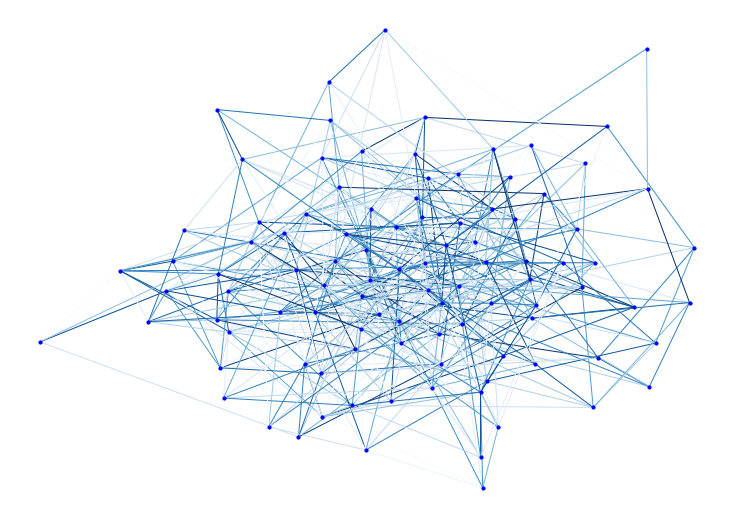

In [205]:
G = nx.Graph(array)
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())


options = {
    "font_size": 0,
    "node_size": 10,
    "node_color": "b",
    "edgelist" : edges,
    "edge_color": weights,
    "edge_cmap": plt.cm.Blues,
    "edgecolors": "blue",
    "linewidths": 1,
    "width": 1,
}

plt.figure(figsize=(10,7))
nx.draw(G, pos=nx.spring_layout(G), **options)
plt.savefig(fname = "D:/Магистр/Algorithms/graph_6.1.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)


<ipython-input-219-8ae249573218>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "D:/Магистр/Algorithms/graph_6.2.png", dpi=300, facecolor='w', edgecolor='w',
<ipython-input-219-8ae249573218>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "D:/Магистр/Algorithms/graph_6.2.png", dpi=300, facecolor='w', edgecolor='w',


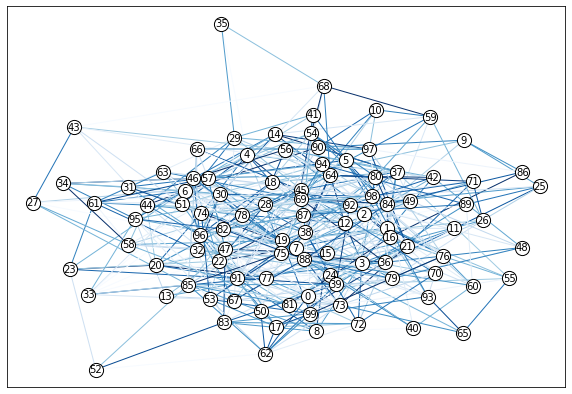

In [219]:
options = {
    "font_size": 10,
    "node_size": 200,
    "node_color": "white",
    "edgecolors": "black",
    "edgelist" : edges,
    "edge_color": weights,
    "edge_cmap": plt.cm.Blues,
    "linewidths": 1,
    "width": 1,
}

plt.figure(figsize=(10,7))
nx.draw_networkx(G, **options)

# Set margins for the axes so that nodes aren't clipped
#ax = plt.gca()
#ax.margins(0.2)
plt.savefig(fname = "D:/Магистр/Algorithms/graph_6.2.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)
# plt.axis("off")
# plt.show()

# Dijkstra's and Bellman-Ford algorithms to find shortest paths

In [207]:
!pip install prettytable

In [222]:
start_index = np.random.randint(len(G.nodes))
start_node= np.array(G.nodes)[start_index]
finish_nodes = np.random.choice(len(G.nodes), 100)

dj_times = []
bf_times = []

for finish_node in finish_nodes:
    start_dj = time()
    dijkstra_path = nx.dijkstra_path(G, start_node, finish_node)
    end_dj = time()
    bellman_ford_path = nx.bellman_ford_path(G, start_node, finish_node)
    end_bf = time()
    dj_times.append(end_dj - start_dj)
    bf_times.append(end_bf - end_dj)
    
dj_mid = sum(dj_times)/len(dj_times)
bf_mid = sum(bf_times)/len(bf_times)


from prettytable import PrettyTable
th = ['Type algorithm', 'Start vertex', 'Other vertices', 'Average time']
td = ['Dijkstra', start_node, finish_nodes, '%.6f' % dj_mid,
       '', '', '', '',
       '', '', '', '',
      'Bellman-Ford', start_node, finish_nodes, '%.6f' % bf_mid]

columns = len(th)
table = PrettyTable(th)
td_data = td[:]

while td_data:
    table.add_row(td_data[:columns])
    td_data = td_data[columns:]

print(table) 

+----------------+--------------+--------------------------------------------------------------------------+--------------+
| Type algorithm | Start vertex |                              Other vertices                              | Average time |
+----------------+--------------+--------------------------------------------------------------------------+--------------+
|    Dijkstra    |      48      | [59 41 49  1  7 56 28 38 24 39 28 33  0 80 13 73 90 28  5 67 52 44 34 99 |   0.000700   |
|                |              |   0 85 57 98  4 77 45 57 73 56 23 25 67 79 75 24 32 39 12 95 84 89 61 46 |              |
|                |              |   9 69  3 24 50 46  1 35 44 62 83 88 29 40 47 15 79 39 75 99 41  6 78 98 |              |
|                |              |  71 39 78 83 28 43 27 98  3 85 54 88  1 87 31 52 26 35 51 42  1  9 30 32 |              |
|                |              |                               10 48 19 60]                               |              |
|       

# A* algorithm

<ipython-input-211-e075a8cd2317>:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "D:/Магистр/Algorithms/graph_6.3.png", dpi=300, facecolor='w', edgecolor='w',
<ipython-input-211-e075a8cd2317>:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "D:/Магистр/Algorithms/graph_6.3.png", dpi=300, facecolor='w', edgecolor='w',


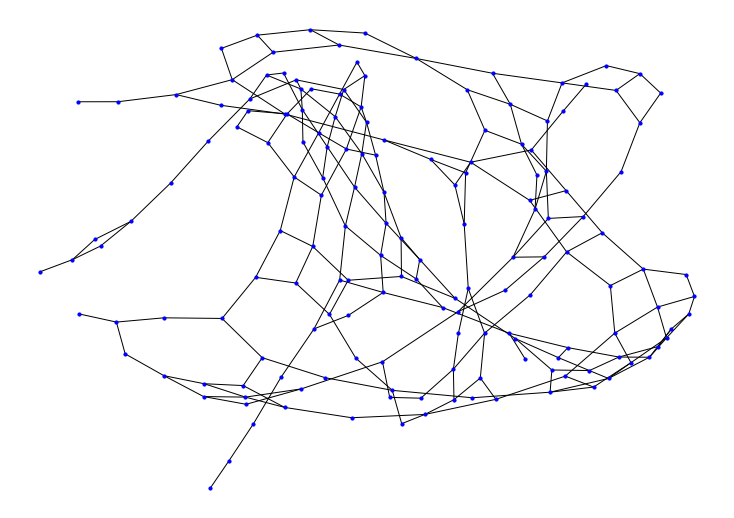

In [211]:
grid = nx.generators.lattice.grid_2d_graph(10, 20)

del_node = [(np.random.randint(0, 10), np.random.randint(0, 20)) for i in range(40)]
grid.remove_nodes_from(del_node)

options = {
    "font_size": 0,
    "node_size": 10,
    "node_color": "blue",
    "edgecolors": "blue",
    "linewidths": 1,
    "width": 1,
}

plt.figure(figsize=(10,7))
nx.draw(grid, **options)
plt.savefig(fname = "D:/Магистр/Algorithms/graph_6.3.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

In [213]:
th = ['Start cell', 'End cell', 'Path', 'Path length','Time']
table = PrettyTable(th)
table._max_width = {"Path" : 60}

N = 5
for n in range(N):
    idx_1, idx_2 = random.sample(range(len(grid.nodes)), 2)
    node_1, node_2 = np.array(grid.nodes)[idx_1], np.array(grid.nodes)[idx_2]
    
    start_time = time()
    path = nx.astar_path(grid, tuple(node_1), tuple(node_2))
    end_time = time()
    
    t = end_time - start_time

    table.add_row([tuple(node_1), tuple(node_2), path, len(path), '%.6f' % t])
    table.add_row(['', '', '', '', ''])
print(table)

+------------+----------+--------------------------------------------------------------+-------------+----------+
| Start cell | End cell |                             Path                             | Path length |   Time   |
+------------+----------+--------------------------------------------------------------+-------------+----------+
|   (7, 7)   | (4, 12)  |  [(7, 7), (6, 7), (6, 8), (6, 9), (5, 9), (4, 9), (4, 10),   |      9      | 0.001005 |
|            |          |                      (4, 11), (4, 12)]                       |             |          |
|            |          |                                                              |             |          |
|  (1, 18)   |  (4, 8)  |  [(1, 18), (0, 18), (0, 17), (0, 16), (1, 16), (1, 15), (1,  |      16     | 0.001998 |
|            |          |  14), (1, 13), (2, 13), (3, 13), (4, 13), (4, 12), (4, 11),  |             |          |
|            |          |                   (4, 10), (4, 9), (4, 8)]                   |